### SMOTE (Synthetic Minority Oversampling Technique)
Metode ini digunakan pada kasus Imbalance Class. Peristiwa ini terjadi ketika banyaknya pengamatan antar kelas tidak proporsional, sehingga 
bisa ditimbulkan bias. Cara mengatasi imbalance class bisa dengan cara undersampling maupun oversampling.

Beberapa hal terkait SMOTE 
1. Dilihat dari penamaan, dapat dilihat bahwa metode ini, pada kelas minoritas akan di-generate sampel baru (secara sintetik). 
2. Teknik ini dinamakan oversampling karena menambahkan data baru dalam proses analisis data. 
3. Berlainan dengan oversampling, undersampling akan mengurangi data dalam proses analisis data.


<img src="image/chart1.png?1" alt="Schema of adaptive filter" height="100"/>
<img src="image/chart2.png?1" alt="Schema of adaptive filter" height="100"/>
<img src="image/chart3.png?1" alt="Schema of adaptive filter" height="100"/>

### Refference
1. https://www.youtube.com/watch?v=FheTDyCwRdE
2. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
3. https://kite.com/blog/python/smote-python-imbalanced-learn-for-oversampling/
4. https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance


In [2]:
# for reproducibility purposes
seed = 100

# create balanced dataset
X1, Y1 = make_classification(n_samples=700, n_features=2, n_redundant=0,
                            n_informative=2, n_clusters_per_class=1,
                            class_sep=1.0, flip_y=0.06, random_state=seed)


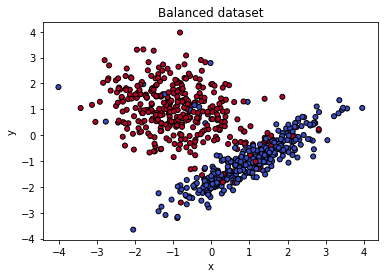

In [6]:
plt.title('Balanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

In [7]:
# concatenate the features and labels into one dataframe
df = pd.concat([pd.DataFrame(X1), pd.DataFrame(Y1)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
# save the dataset because we'll use it later
df.to_csv('df_base.csv', index=False, encoding='utf-8')

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC

def train_SVM(df):
   # select the feature columns
   X = df.loc[:, df.columns != 'label']
   # select the label column
   y = df.label

   # train an SVM with linear kernel
   clf = SVC(kernel='linear')
   clf.fit(X, y)

   return clf


def plot_svm_boundary(clf, df, title):
   fig, ax = plt.subplots()
   X0, X1 = df.iloc[:, 0], df.iloc[:, 1]

   x_min, x_max = X0.min() - 1, X0.max() + 1
   y_min, y_max = X1.min() - 1, X1.max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

   ax.scatter(X0, X1, c=df.label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
   ax.set_ylabel('y')
   ax.set_xlabel('x')
   ax.set_title(title)
   plt.show()

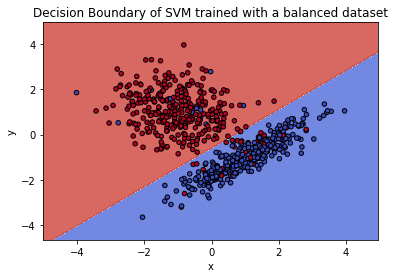

In [10]:
df =  pd.read_csv('df_base.csv', encoding='utf-8', engine='python')
clf = train_SVM(df)
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a balanced dataset')

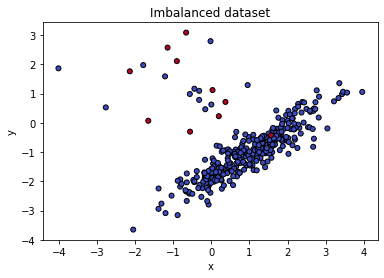

In [11]:
X_res, y_res = make_imbalance(X1, Y1, sampling_strategy={0: 340, 1: 10}, random_state=seed)
plt.title('Imbalanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()


df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_imbalanced.csv', index=False, encoding='utf-8')

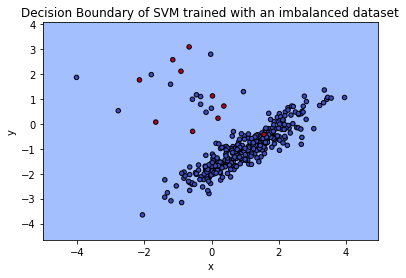

In [12]:
df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
clf = train_SVM(df)
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with an imbalanced dataset')

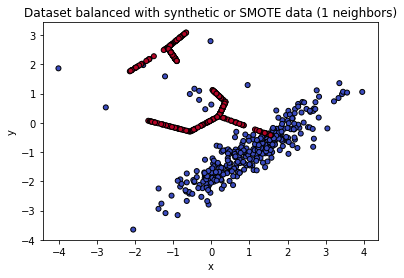

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 1

df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
# make a new df made of all the columns, except the target class
X = df.loc[:, df.columns != 'label']
y = df.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

plt.title('Dataset balanced with synthetic or SMOTE data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], marker='o', c=y_res, s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

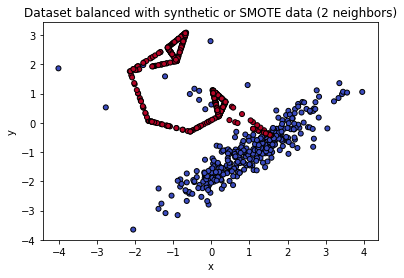

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 2

df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
# make a new df made of all the columns, except the target class
X = df.loc[:, df.columns != 'label']
y = df.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

plt.title('Dataset balanced with synthetic or SMOTE data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], marker='o', c=y_res, s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

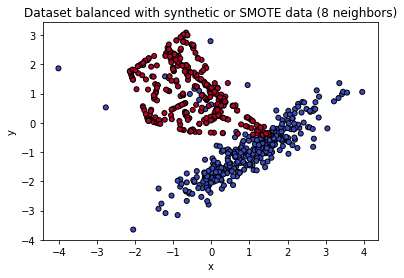

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 8

df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
# make a new df made of all the columns, except the target class
X = df.loc[:, df.columns != 'label']
y = df.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

plt.title('Dataset balanced with synthetic or SMOTE data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], marker='o', c=y_res, s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')